In [33]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [34]:
with open('results.json') as json_data:
    results= json.load(json_data)
    json_data.close()

In [37]:
dimensions = np.array(results["dimensions"])
Delta_gt = results["Delta_gt"]
sigma_gt = results["sigma_gt"]


In [55]:
results["HVAE1"]

{'1': {'Delta': [[-1.4666409492492676]], 'sigma': [[0.9939698576927185]]},
 '2': {'Delta': [[0.22754856944084167, 1.0524646043777466]],
  'sigma': [[0.9986454844474792, 0.9935823082923889]]},
 '3': {'Delta': [[0.14138604700565338,
    0.800561785697937,
    0.32534974813461304]],
  'sigma': [[1.002773404121399, 0.10700604319572449, 0.9885019063949585]]},
 '5': {'Delta': [[0.06718005239963531,
    -1.371918797492981,
    -0.1898428201675415,
    -0.8036828637123108,
    0.5796747803688049]],
  'sigma': [[0.9866413474082947,
    0.32592517137527466,
    0.10617990046739578,
    0.3275033235549927,
    0.9989433884620667]]},
 '11': {'Delta': [[-2.6413357257843018,
    -0.7517931461334229,
    0.4430975317955017,
    0.5649484395980835,
    -0.22361652553081512,
    1.0352883338928223,
    -0.5499060750007629,
    -0.9216604232788086,
    1.2046200037002563,
    1.2822215557098389,
    0.526821494102478]],
  'sigma': [[1.0047811269760132,
    0.6880630850791931,
    0.42146196961402893,
  

In [50]:
Delta_errors_VB = [np.sum((np.array(results["VB"][str(dimensions[i])]["Delta"])-np.array(Delta_gt[i]))**2) for i in range(len(dimensions))] 
Delta_errors_HVAE1 = [np.sum((np.array(results["HVAE1"][str(dimensions[i])]["Delta"]))-np.array(Delta_gt[i])**2) for i in range(len(dimensions))] 
Delta_errors_HVAE10 = [np.sum((np.array(results["HVAE1"][str(dimensions[i])]["Delta"])-np.array(Delta_gt[i]))**2) for i in range(len(dimensions))]

sigma_errors_VB = [np.sum((np.array(results["VB"][str(dimensions[i])]["sigma"])-np.array(sigma_gt[i]))**2) for i in range(len(dimensions))] 
sigma_errors_HVAE1 = [np.sum((np.array(results["HVAE1"][str(dimensions[i])]["sigma"])-np.array(sigma_gt[i]))**2) for i in range(len(dimensions))] 
sigma_errors_HVAE10 = [np.sum((np.array(results["HVAE1"][str(dimensions[i])]["sigma"])-np.array(sigma_gt[i]))**2) for i in range(len(dimensions))]

theta_errors_VB = [Delta_errors_VB[i] + sigma_errors_VB[i] for i in range(len(dimensions))]
theta_errors_HVAE1 = [Delta_errors_HVAE1[i] + sigma_errors_HVAE1[i] for i in range(len(dimensions))]
theta_errors_HVAE10 = [Delta_errors_HVAE10[i] + sigma_errors_HVAE10[i] for i in range(len(dimensions))]

In [51]:
theta_errors_HVAE1

[np.float64(-1.4666045866330215),
 np.float64(1.2600561947017779),
 np.float64(1.1874865610013692),
 np.float64(-2.118364776694308),
 np.float64(-4.4309853787996705),
 np.float64(-54.670259809775914),
 np.float64(-435.6813154535124),
 np.float64(-3434.3336109614056),
 np.float64(-27075.403847005375),
 np.float64(-90889.27640286603)]

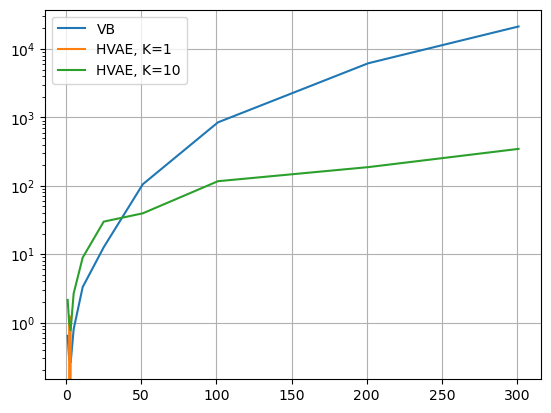

In [54]:
fig, ax = plt.subplots()
ax.plot(dimensions, theta_errors_VB, label = "VB")
ax.plot(dimensions, theta_errors_HVAE1, label = "HVAE, K=1")
ax.plot(dimensions, theta_errors_HVAE10, label = "HVAE, K=10")
ax.set_yscale("log")
ax.grid()
ax.legend()